# Métodos ensemble:

1. Cargar los datos MNIST y dividirlos en un conjunto de entrenamiento, un conjunto de validación y un conjunto de test (por ejemplo, utilizar 50.000 instancias para entrenamiento, 10.000 para validación y 10.000 para pruebas). Luego, entrenar varios clasificadores, como un clasificador Random Forest, un clasificador Extra-Trees y un clasificador SVM. A continuación, intentar combinarlos en un conjunto que supere a cada clasificador individual en el conjunto de validación, utilizando votación soft o hard. Una vez que haya encontrado uno, probarlo en el conjunto de pruebas. ¿Cuánto mejor se desempeña en comparación con los clasificadores individuales?


In [1]:
from sklearn.datasets import fetch_openml

# Obtengo dataset MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]


/home/fran/Documentos/5 AÑO/Sistemas Inteligentes carpeta/Sistemas-Inteligentes/sappienv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
from sklearn.model_selection import train_test_split

# Divido en conjuntos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=10000, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamos el clasificador RandomForest
rfc = RandomForestClassifier(n_estimators=30, random_state=42) #30 estimators porque sino tarda mucho
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=30, random_state=42)

In [4]:
from sklearn.ensemble import ExtraTreesClassifier

# Entrenamos el clasificador ExtraTree
etc = ExtraTreesClassifier(n_estimators=30, random_state=42)
etc.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=30, random_state=42)

In [5]:
from sklearn.svm import LinearSVC

# Entrenamos el clasificador Linear SVC
svc = LinearSVC()
svc.fit(X_train, y_train)

/home/fran/Documentos/5 AÑO/Sistemas Inteligentes carpeta/Sistemas-Inteligentes/sappienv/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [6]:
# Entrenamos el modelo Gradient Boosting para luego usarlo en el clasificador de votacion, ya que el SVC nos arruina el modelo

#from sklearn.ensemble import GradientBoostingClassifier
#grd = GradientBoostingClassifier()
#grd.fit(X_train, y_train)

# tarda demasiado en ejecutarse

In [7]:
# Predecimos y evaluamos en el conjunto de validacion cada uno de los modelos para ver como se desempeñam los Clasificadores individuales

from sklearn.metrics import accuracy_score

# RandomForest
y_pred_rfc = rfc.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_rfc)

print("Accuracy: ", accuracy)


Accuracy:  0.9625


In [8]:
# ExtraTree
y_pred_etc = etc.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_etc)

print("Accuracy: ", accuracy)

Accuracy:  0.9652


In [9]:
# LinearSVC
y_pred_svc = svc.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_svc)

print("Accuracy: ", accuracy)

Accuracy:  0.8044


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

# Utilizamos clasificador Voting Clasiffier "hard"

voting_clf=VotingClassifier(
    estimators=[('rfc',rfc),('etc',etc)],voting='hard') #evaluamos solo con dos modelos porque SVC arruina el modelo y Gradient Boosting tarda mucho (+1 hora)

# Entrenamos y predecimos el modelo
voting_clf.fit(X_train,y_train)
y_pred_voting_clf = voting_clf.predict(X_valid)

# Analizamos Accuracy
accuracy_voting=accuracy_score(y_valid, y_pred_voting_clf)
print("Accuracy: ",accuracy_voting)

Accuracy:  0.963


In [11]:
# Utilizamos clasificador Voting Clasiffier "soft"

voting_clf=VotingClassifier(
    estimators=[('rfc',rfc),('etc',etc)],voting='soft') #evaluamos solo con dos modelos porque SVC arruina el modelo y Gradient Boosting tarda mucho (+1 hora)

# Entrenamos y predecimos el modelo
voting_clf.fit(X_train,y_train)
y_pred_voting_clf = voting_clf.predict(X_valid)

# Analizamos Accuracy
accuracy_voting=accuracy_score(y_valid, y_pred_voting_clf)
print("Accuracy: ",accuracy_voting)

Accuracy:  0.9678


In [12]:
from sklearn.metrics import accuracy_score

# Evaluar el conjunto combinado en el conjunto de pruebas
y_pred_voting_clf = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting_clf)

# Evaluar cada clasificador individual en el conjunto de pruebas
y_pred_rfc = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)

y_pred_etc = etc.predict(X_test)
etc_accuracy = accuracy_score(y_test, y_pred_etc)

y_pred_svc = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)

# Mostrar los resultados
print("Accuracy del conjunto combinado (votación soft): {:.2f}%".format(voting_accuracy * 100))
print("Accuracy del clasificador Random Forest: {:.2f}%".format(rfc_accuracy * 100))
print("Accuracy del clasificador Extra-Trees: {:.2f}%".format(etc_accuracy * 100))
print("Accuracy del clasificador Gradient Boosting: {:.2f}%".format(svc_accuracy * 100))


Accuracy del conjunto combinado (votación soft): 96.54%
Accuracy del clasificador Random Forest: 95.95%
Accuracy del clasificador Extra-Trees: 96.33%
Accuracy del clasificador Gradient Boosting: 80.31%


2. Ejecutar los clasificadores individuales del ejercicio anterior para hacer predicciones en el conjunto de validación y crear un nuevo conjunto de entrenamiento con las predicciones resultantes: cada instancia de entrenamiento es un vector que contiene el conjunto de predicciones de todos los clasificadores para una imagen, y el objetivo es la clase de la imagen. Entrenar un clasificador en este nuevo conjunto de entrenamiento. ¡Felicidades, acaba de entrenar un blender, y junto con los clasificadores forma un conjunto de stacking! Ahora evaluar el conjunto en el conjunto de pruebas. Para cada imagen en el conjunto de pruebas, hacer predicciones con todos los clasificadores, y luego alimentar las predicciones al mezclador para obtener las predicciones del conjunto. ¿Cómo se compara con el clasificador de votación que entrenó anteriormente?

In [13]:
import numpy as np

# Crear el nuevo conjunto de entrenamiento con las probabilidades de clase
X_train_blender = np.column_stack((y_pred_rfc, y_pred_etc, y_pred_svc))
y_train_blender = y_valid

In [14]:
# Entrenamos un clasificador en el nuevo conjunto de entrenamiento

blender = RandomForestClassifier(n_estimators=100, random_state=42)
blender.fit(X_train_blender, y_train_blender)

RandomForestClassifier(random_state=42)

In [15]:
# Obtener las probabilidades de clase de los clasificadores individuales en el conjunto de pruebas
y_pred_rfc_test = rfc.predict(X_test)
y_pred_etc_test = etc.predict(X_test)
y_pred_svc_test = svc.predict(X_test)

In [16]:
# Crear el nuevo conjunto de prueba con las predicciones
X_test_blend = np.column_stack((y_pred_rfc_test, y_pred_etc_test, y_pred_svc_test))

# Hacer predicciones en el conjunto de pruebas utilizando el clasificador conjunto (blender)
y_pred_blend = blender.predict(X_test_blend)

In [17]:
# Evaluar el rendimiento del clasificador conjunto en el conjunto de pruebas
blend_accuracy = accuracy_score(y_test, y_pred_blend)
print("Exactitud del clasificador conjunto en el conjunto de pruebas:", blend_accuracy)

Exactitud del clasificador conjunto en el conjunto de pruebas: 0.195




3. Realice el ejercicio 1. otra vez utilizando los algoritmo XGBoost, LightGBM y CatBoost.

In [18]:
# Convertir las etiquetas a números enteros
# y_train = y_train.astype(np.int32)
# y_valid = y_valid.astype(np.int32)

# esto es para Gboost porque toma los datos como no enteros

In [19]:
# XGBoost
# from xgboost import XGBClassifier

# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)
# y_pred_xgb = xgb.predict(X_valid)
# accuracy_xgb = accuracy_score(y_valid, y_pred_xgb)

# anda pero tarda mucho

In [20]:
# LightGBM
# from lightgbm import LGBMClassifier

#lgt=LGBMClassifier()
#lgt.fit(X_train,y_train)

# Predecimos y vemos accuracy
#y_pred_lgt=lgt.predict(X_valid)
#accuracy_lgt=accuracy_score(y_valid, y_pred_lgt)
#print("Accuracy: ",accuracy_lgt)

# tarda mucho

In [21]:
# Catboost
# from catboost import CatBoostClassifier

# cb = CatBoostClassifier()
# cb.fit(X_train, y_train)
# y_pred_cb = cb.predict(X_valid)
# accuracy_cb = accuracy_score(y_valid, y_pred_cb)

# Reducción dimensional

1. Cargue el conjunto de datos MNIST (introducido en el capítulo 3) y divídalo en un conjunto de entrenamiento y un conjunto de pruebas (tome las primeras 60,000 instancias para entrenamiento y las 10,000 restantes para test). Entrene un clasificador Random Forest en el conjunto de datos y tome el tiempo que tarda, luego evalúe el modelo resultante en el conjunto de test. A continuación, use PCA para reducir la dimensionalidad del conjunto de datos, con una relación de varianza explicada del 95%. Entrenar un nuevo clasificador Random Forest en el conjunto de datos reducido y ver cuánto tiempo tarda. ¿Fue el entrenamiento mucho más rápido? A continuación, evalúe el clasificador en el conjunto de pruebas. ¿Cómo se compara con el clasificador anterior?

In [22]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)

# Obtener las características (X) y las etiquetas (y)
X = mnist.data
y = mnist.target

/home/fran/Documentos/5 AÑO/Sistemas Inteligentes carpeta/Sistemas-Inteligentes/sappienv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=42)

In [24]:
# Crear nuevo clasificador Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
import time

# Entrenamos el modelo y medimos el tiempo que tarda
start_time = time.time()
rfc.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Tiempo de entrenamiento:", training_time, "segundos")

Tiempo de entrenamiento: 132.7024862766266 segundos


In [26]:
# Prediccion y accuracy

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print("Exactitud del clasificador original en el conjunto de prueba:", accuracy)

Exactitud del clasificador original en el conjunto de prueba: 0.9674


In [27]:
# Utilizamos PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)


In [28]:
rfc_reduced = RandomForestClassifier(n_estimators=100)

# Entrenamos y medimos tiempo de RandomForest reducido

start_time = time.time()
rfc_reduced.fit(X_train_reduced, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Tiempo de entrenamiento con PCA:", training_time, "segundos")


Tiempo de entrenamiento con PCA: 285.13964581489563 segundos


In [29]:
y_pred_reduced = rfc_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print("Exactitud en el conjunto de pruebas con PCA:", accuracy_reduced)


Exactitud en el conjunto de pruebas con PCA: 0.9458


2. Use t-SNE para reducir el conjunto de datos MNIST a dos dimensiones y grafique el resultado usando Matplotlib. Puede usar un gráfico de dispersión utilizando 10 colores diferentes para representar la clase objetivo de cada imagen. Alternativamente, puede reemplazar cada punto en el gráfico de dispersión con la clase correspondiente de la instancia (un dígito del 0 al 9), o incluso graficar versiones reducidas de las imágenes de dígitos en sí mismas (si grafica todos los dígitos, la visualización será demasiado desordenada, por lo que debe dibujar una muestra aleatoria o graficar una instancia solo si no se ha graficado otra instancia a una distancia cercana). Debería obtener una visualización con grupos de dígitos bien separados. Intente usar otros algoritmos de reducción de dimensionalidad como PCA, LLE o MDS y compare las visualizaciones resultantes.

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']


/home/fran/Documentos/5 AÑO/Sistemas Inteligentes carpeta/Sistemas-Inteligentes/sappienv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [32]:
# Reducir la dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

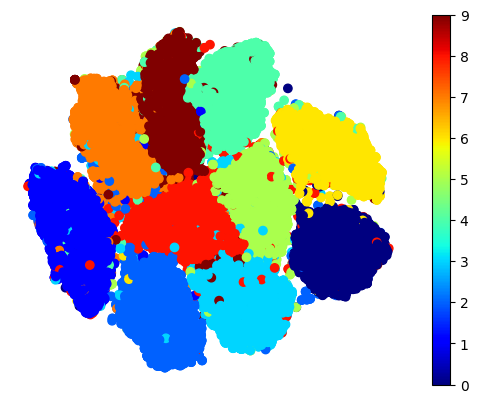

In [38]:
# Graficar los puntos en un gráfico de dispersión con diferentes colores para cada clase
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=y_train.astype(int),cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [40]:
# Utilizamos PCA

from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)

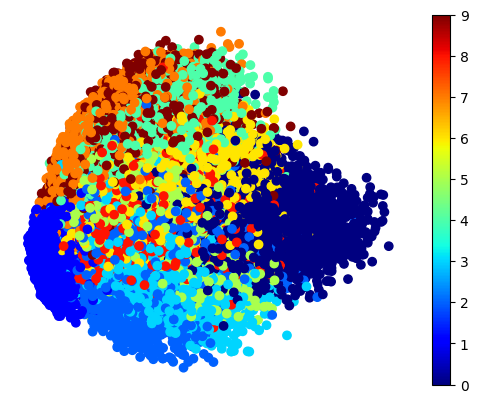

In [41]:
# Graficar los puntos en un gráfico de dispersión con diferentes colores para cada clase con PCA
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train.astype(int),cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

# Preguntas teóricas
### Métodos de ensamble

1. Si ha entrenado cinco modelos diferentes en los mismos datos de entrenamiento y todos logran una precisión del 95%, ¿existe alguna posibilidad de combinar estos modelos para obtener mejores resultados? Si es así, ¿cómo? Si no, ¿por qué?
2. ¿Cuál es la diferencia entre los clasificadores de votación hard y de votación soft?
3. ¿Es posible acelerar el entrenamiento de un conjunto de bagging distribuyéndolo en varios servidores? ¿Qué pasa con los conjuntos de pasting, los conjuntos de boosting, los Random Forest o los ensambles Stacking?
4. ¿Cuál es el beneficio de la evaluación out-of-bag (OOB)?
5. ¿Qué hace que los Extra-Trees sean más aleatorios que los Random Forest regulares? ¿Cómo puede esta aleatoriedad adicional ayudar? ¿Son los Extra-Trees más lentos o más rápidos que los Random Forest regulares?
6. Si su conjunto de AdaBoost no se ajusta lo suficientemente bien a los datos de entrenamiento, ¿qué hiperparámetros debe ajustar y cómo?
7. Si su conjunto de Gradient Boosting sobreajusta el conjunto de entrenamiento, ¿debería aumentar o disminuir la tasa de aprendizaje?


### Reducción dimensional

1. ¿Cuáles son las principales motivaciones para reducir la dimensionalidad de un conjunto de datos? ¿Cuáles son las principales desventajas?
2. ¿A qué se denomina la maldición de la dimensionalidad?
3. Una vez que se ha reducido la dimensionalidad de un conjunto de datos, ¿es posible revertir la operación? Si es así, ¿cómo? Si no, ¿por qué no?
4. ¿Se puede utilizar PCA para reducir la dimensionalidad de un conjunto de datos altamente no lineal?
5. Suponga que realiza PCA en un conjunto de datos de 1,000 dimensiones, estableciendo la relación de varianza explicada en un 95%. ¿Cuántas dimensiones tendrá el conjunto de datos resultante?
6. ¿En qué casos utilizaría PCA simple, PCA incremental, PCA aleatorio o kernel PCA?
7. ¿Cómo se puede evaluar el rendimiento de un algoritmo de reducción de dimensionalidad en su conjunto de datos?
8. ¿Tiene sentido encadenar dos algoritmos de reducción de dimensionalidad diferentes?